# 01: Building a pandas Cheat Sheet, Part 1: Animals

* Use the csv I've attached to answer the following questions
* Import pandas with the right name
* Set all graphics from matplotlib to display inline
* Read the csv in (it should be UTF-8 already so you don't have to worry about encoding), save it with the proper boring name
* Display the names of the columns in the csv
* Display the first 3 animals.
* Sort the animals to see the 3 longest animals.
* What are the counts of the different values of the "animal" column? a.k.a. how many cats and how many dogs.
* Only select the dogs.
* Display all of the animals that are greater than 40 cm.
'length' is the animal's length in cm. Create a new column called inches that is the length in inches.
* Save the cats to a separate variable called "cats." Save the dogs to a separate variable called "dogs."
* Display all of the animals that are cats and above 12 inches long. First do it using the "cats" variable, then do it using your normal dataframe.
* What's the mean length of a cat?
* What's the mean length of a dog?
* Use groupby to accomplish both of the above tasks at once.
* Make a histogram of the length of dogs. I apologize that it is so boring.
* Change your graphing style to be something else (anything else!)
* Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)
* Make a sorted horizontal bar graph of the cats, with the larger cats on top.


In [3]:
# Import pandas with the right name
# Set all graphics from matplotlib to display inline
import pandas as pd
import matplotlib.pyplot as plt
# don't do this, but it means the thing above
#from matplotlib import pyplot as plt
%matplotlib inline

* Read the csv in (it should be UTF-8 already so you don't have to worry about encoding), save it with the proper boring name
* Display the names of the columns in the csv
* Display the first 3 animals.

In [4]:
df = pd.read_csv("07-hw-animals.csv")

In [5]:
df.columns

Index(['animal', 'name', 'length'], dtype='object')

In [6]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


In [7]:
# * Sort the animals to see the 3 longest animals.

In [10]:
df.sort_values(by='length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


In [13]:
# * What are the counts of the different values of the "animal" column? a.k.a. how many cats and how many dogs.
df['animal'].value_counts()

cat    3
dog    3
Name: animal, dtype: int64

In [14]:
# * Only select the dogs.
df['animal'] == 'dog'

0    False
1    False
2     True
3     True
4    False
5     True
Name: animal, dtype: bool

In [15]:
# If you want the rows back, you have to put a df[ ] on the outside
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [18]:
is_dog = df['animal'] == 'dog'
is_dog

0    False
1    False
2     True
3     True
4    False
5     True
Name: animal, dtype: bool

In [20]:
dogs = df[is_dog]
dogs

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [21]:
dogs[df['length'] > 40]

/Users/soma/.virtualenvs/data-analysis/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50


In [22]:
df['animal'] == 'dog'

0    False
1    False
2     True
3     True
4    False
5     True
Name: animal, dtype: bool

In [23]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [25]:
#* Display all of the animals that are greater than 40 cm.
# 'length' is the animal's length in cm. Create a new column called inches that is the length in inches.
#* Save the cats to a separate variable called "cats." Save the dogs to a separate variable called "dogs."
#* Display all of the animals that are cats and above 12 inches long. First do it using the "cats" variable, then do it using your normal dataframe.

In [26]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


In [28]:
# save a new column using a calculation on an existing column
df['inches'] = df['length'] / 2.54

In [29]:
df

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
4,cat,Charlie,32,12.598425
5,dog,Fontaine,35,13.779528


In [31]:
#* Display all of the animals that are cats and above 12 inches long.
# First do it using the "cats" variable, then do it using your normal dataframe.
cats = df[df['animal'] == 'cat']
cats

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


In [32]:
cats[cats['inches'] > 12]

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


In [38]:
#df[df['animal'] == 'cat' & df['inches'] > 12]
big_cats = df[(df['animal'] == 'cat') & (df['inches'] > 12)]
big_cats

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


In [37]:
is_cat = df['animal'] == 'cat'
is_over_twelve_inches = df['inches'] > 12
df[is_cat & is_over_twelve_inches]


,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


In [39]:
#* What's the mean length of a cat?
#* What's the mean length of a dog?
#* Use groupby to accomplish both of the above tasks at once.
#* Make a histogram of the length of dogs. I apologize that it is so boring.
#* Change your graphing style to be something else (anything else!)
#* Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)
#* Make a sorted horizontal bar graph of the cats, with the larger cats on top.

In [41]:
cats['length'].mean()

37.333333333333336

In [42]:
cats['length'].describe()

count     3.000000
mean     37.333333
std       6.806859
min      32.000000
25%      33.500000
50%      35.000000
75%      40.000000
max      45.000000
Name: length, dtype: float64

In [43]:
dogs = df[df['animal'] == 'dog']
dogs['length'].mean()

50.0

In [44]:
dogs['length'].describe()

count     3.0
mean     50.0
std      15.0
min      35.0
25%      42.5
50%      50.0
75%      57.5
max      65.0
Name: length, dtype: float64

In [47]:
#* Use groupby to accomplish both of the above tasks at once.
df.groupby('animal').describe()

inches     length
animal                            
cat    count   3.000000   3.000000
       mean   14.698163  37.333333
       std     2.679866   6.806859
       min    12.598425  32.000000
       25%    13.188976  33.500000
       50%    13.779528  35.000000
       75%    15.748031  40.000000
       max    17.716535  45.000000
dog    count   3.000000   3.000000
       mean   19.685039  50.000000
       std     5.905512  15.000000
       min    13.779528  35.000000
       25%    16.732283  42.500000
       50%    19.685039  50.000000
       75%    22.637795  57.500000
       max    25.590551  65.000000

In [48]:
df.groupby('animal')['length'].sum()

animal
cat    112
dog    150
Name: length, dtype: int64

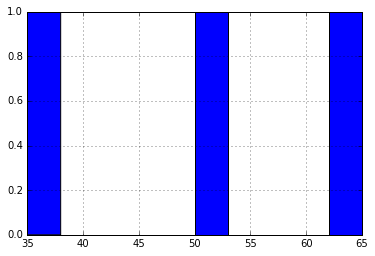

In [49]:
dogs['length'].hist()

In [50]:
plt.style.use("ggplot")

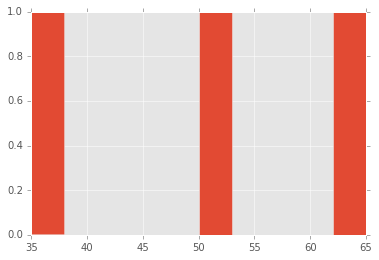

In [51]:
dogs['length'].hist()

In [52]:
#* Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)
#* Make a sorted horizontal bar graph of the cats, with the larger cats on top.

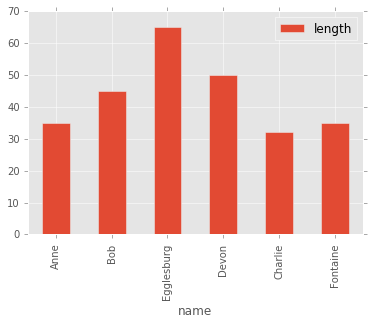

In [54]:
df.plot(kind='bar', x='name', y='length')

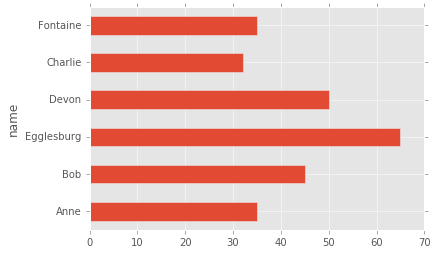

In [57]:
df.plot(kind='barh', x='name', y='length', legend=False)

In [58]:
#* Make a sorted horizontal bar graph of the cats,
# with the larger cats on top.

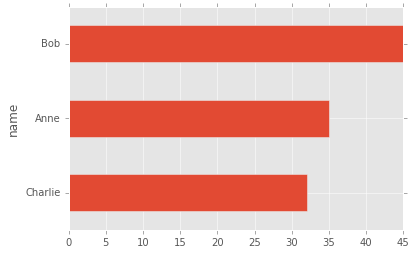

In [66]:
df[df['animal'] == 'cat'].sort_values(by='length').plot(kind='barh', x='name', y='length', legend=False)

# Part 02: Doing some research (billionaires)

Answer your own selection out of the following questions, or any other questions you might be able to think of.  Write the question down first in a markdown cell (use a # to make the question a nice header), THEN try to get an answer to it. A lot of these are remarkably similar, and some you'll need to do manual work for - the GDP ones, for example.

If you are trying to figure out some other question that we didn't cover in class and it does not have to do with joining to another data set, we're happy to help you figure it out during lab!

* Take a peek at the billionaires notebook I uploaded into Slack, it should be helpful for the graphs (I added a few other styles and options, too). You'll probably also want to look at the "sum()" line I added.
* What country are most billionaires from? For the top ones, how many billionaires per billion people?
* Who are the top 10 richest billionaires?
* What's the average wealth of a billionaire? Male? Female?
* Who is the poorest billionaire? Who are the top 10 poorest billionaires?
* 'What is relationship to company'? And what are the most common relationships?
* Most common source of wealth? Male vs. female?
* Given the richest person in a country, what % of the GDP is their wealth?
* Add up the wealth of all of the billionaires in a given country (or a few countries) and then compare it to the GDP of the country, or other billionaires, so like pit the US vs India
* What are the most common industries for billionaires to come from? What's the total amount of billionaire money from each industry?
* How many self made billionaires vs. others?
* How old are billionaires? How old are billionaires self made vs. non self made? or different industries?
* Who are the youngest billionaires? The oldest? Age distribution - maybe make a graph about it?
* Maybe just made a graph about how wealthy they are in general?
* Maybe plot their net worth vs age (scatterplot)
* Make a bar graph of the top 10 or 20 richest
